# Depth .npy Summary and Visualization

This notebook loads a depth .npy file, summarizes its contents, and visualizes it as a color-mapped image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to your .npy file
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'  # Change as needed
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path)

shape = arr.shape
dtype = arr.dtype
bit_depth = arr.dtype.itemsize * 8

print(f'File: {npy_path}')
print(f'Shape: {shape}')
if len(shape) == 2:
    print(f'  Height: {shape[0]}')
    print(f'  Width:  {shape[1]}')
else:
    print('  (Warning: Not a 2D array!)')
print(f'Dtype: {dtype}')
print(f'Bit depth per pixel: {bit_depth}')

if np.issubdtype(dtype, np.floating) or np.issubdtype(dtype, np.integer):
    print(f'Min: {np.nanmin(arr)}')
    print(f'Max: {np.nanmax(arr)}')
    print(f'Mean: {np.nanmean(arr)}')
    print(f'Std: {np.nanstd(arr)}')
else:
    print('(Non-numeric array, skipping value stats)')

n_nan = np.isnan(arr).sum() if np.issubdtype(dtype, np.floating) else 0
n_inf = np.isinf(arr).sum() if np.issubdtype(dtype, np.floating) else 0
if n_nan > 0 or n_inf > 0:
    print(f'NaNs: {n_nan}, Infs: {n_inf}')

# Print histogram (clipped to 10 bins for terminal)
if np.issubdtype(dtype, np.floating) or np.issubdtype(dtype, np.integer):
    try:
        hist, edges = np.histogram(arr[~np.isnan(arr)], bins=10)
        print('Value histogram (10 bins):')
        for i in range(len(hist)):
            print(f'  [{edges[i]:.2f}, {edges[i+1]:.2f}]: {hist[i]}')
    except Exception as e:
        print(f'  (Could not compute histogram: {e})')

print('--- End of summary ---')
print('--- Quantization Analysis ---')
# Quantize to 8-bit (0-255)
arr_uint8 = np.clip(np.round(arr * 255), 0, 255).astype(np.uint8)

# Use the entire image
num_unique = len(np.unique(arr_uint8))
num_pixels = arr_uint8.size

num_unique_float = len(np.unique(arr))
print(f'Unique uint8 values in image: {num_unique} / {num_pixels}')
print(f'Unique float values in image: {num_unique_float} / {num_pixels}')
print(f'Fraction of unique values after quantization: {num_unique / num_pixels:.3f}')



File: /home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy
Shape: (498, 640)
  Height: 498
  Width:  640
Dtype: float16
Bit depth per pixel: 16
Min: 0.0
Max: 1.0
Mean: inf
Std: inf
Value histogram (10 bins):
  [0.00, 0.10]: 58523
  [0.10, 0.20]: 39958
  [0.20, 0.30]: 20702
  [0.30, 0.40]: 13724
  [0.40, 0.50]: 8820
  [0.50, 0.60]: 6201
  [0.60, 0.70]: 142650
  [0.70, 0.80]: 8069
  [0.80, 0.90]: 2926
  [0.90, 1.00]: 17147
--- End of summary ---
--- Quantization Analysis ---
Unique uint8 values in image: 256 / 318720
Unique float values in image: 10336 / 318720
Fraction of unique values after quantization: 0.001


/home/abradshaw/.pyenv/versions/3.10.12/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Colorized Depth Visualization

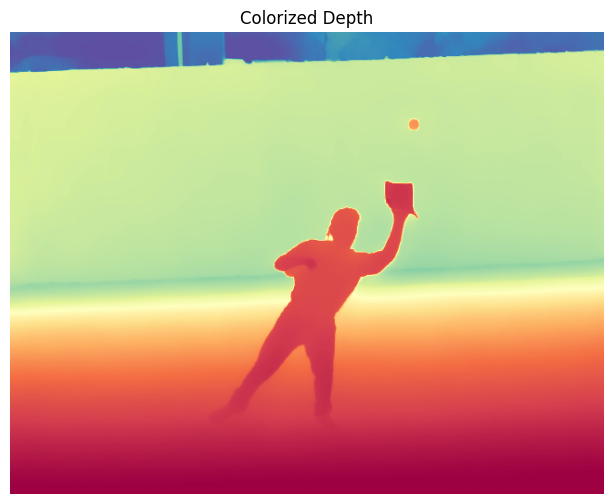

In [13]:
plt.figure(figsize=(8, 6))
# Mask NaNs for display
masked = np.ma.masked_invalid(arr)
im = plt.imshow(masked, cmap='Spectral')
plt.title('Colorized Depth')
plt.axis('off')
plt.show()

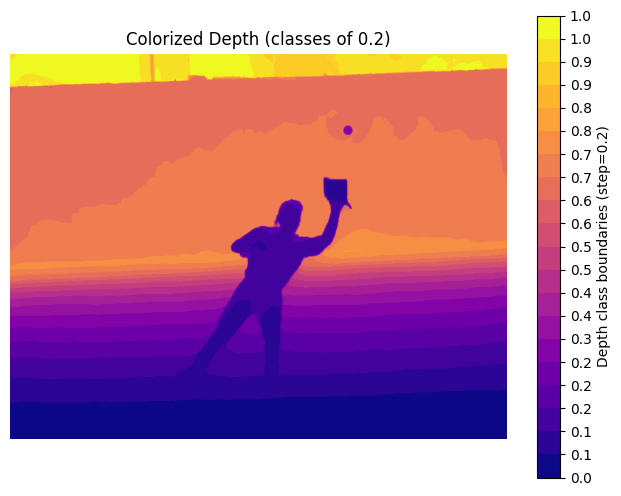

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm

plt.figure(figsize=(8, 6))
boundaries = np.arange(0, 1.01, 0.05)
norm = BoundaryNorm(boundaries, ncolors=256)

masked = np.ma.masked_invalid(arr)
im = plt.imshow(masked, cmap='plasma', norm=norm)
plt.title('Colorized Depth (classes of 0.2)')
cbar = plt.colorbar(im, ticks=boundaries)
cbar.ax.set_yticklabels([f'{b:.1f}' for b in boundaries])
cbar.set_label('Depth class boundaries (step=0.2)')
plt.axis('off')
plt.show()

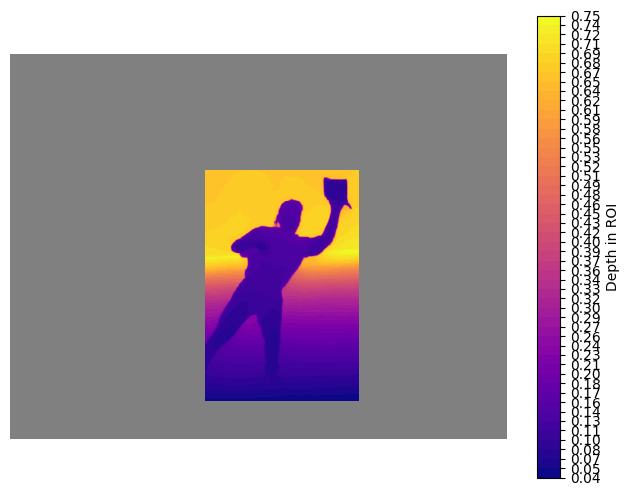

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm

roi = np.zeros_like(arr, dtype=bool)
roi[150:450, 250:450] = True  # Only the top-left 100x100 pixels are ROI
#roi[0:650, 0:650] = True 
# Mask everything outside the ROI
masked = np.ma.masked_where(~roi, arr)

plt.figure(figsize=(8, 6))
boundaries = np.linspace(np.min(arr[roi]), np.max(arr[roi]), 50)  
norm = BoundaryNorm(boundaries, ncolors=256)
cmap = plt.get_cmap('plasma').copy()
cmap.set_bad(color='gray')

im = plt.imshow(masked, cmap=cmap, norm=norm)
cbar = plt.colorbar(im, ticks=boundaries)
cbar.ax.set_yticklabels([f'{b:.2f}' for b in boundaries])
cbar.set_label('Depth in ROI')
plt.axis('off')
plt.show()

## Depth Comaprsion

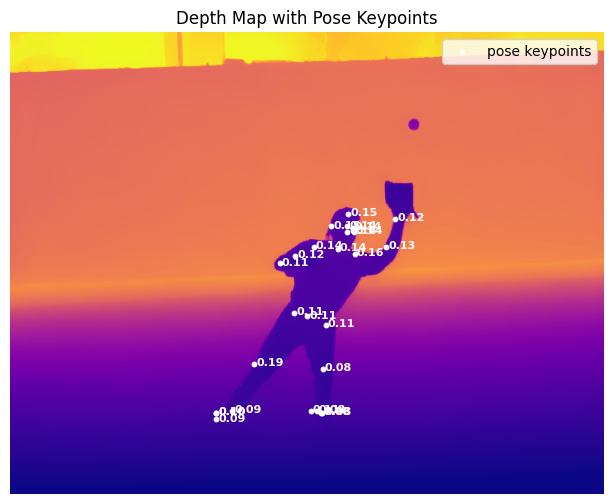

Pose keypoints (x, y) → depth:
  (363, 215) → 0.1385498046875000
  (369, 211) → 0.1416015625000000
  (363, 209) → 0.1398925781250000
  (370, 215) → 0.1430664062500000
  (346, 209) → 0.1492919921875000
  (371, 239) → 0.1619873046875000
  (327, 231) → 0.1446533203125000
  (405, 231) → 0.1345214843750000
  (290, 249) → 0.1140747070312500
  (415, 201) → 0.1209716796875000
  (307, 241) → 0.1199340820312500
  (340, 315) → 0.1118774414062500
  (306, 302) → 0.1143798828125000
  (337, 363) → 0.0803833007812500
  (263, 357) → 0.1910400390625000
  (330, 408) → 0.0808715820312500
  (239, 408) → 0.0858154296875000
  (364, 196) → 0.1499023437500000
  (353, 233) → 0.1434326171875000
  (320, 306) → 0.1134033203125000
  (335, 410) → 0.0772705078125000
  (222, 417) → 0.0861816406250000
  (336, 410) → 0.0769042968750000
  (222, 410) → 0.0950317382812500
  (324, 408) → 0.1105346679687500
  (222, 410) → 0.0950317382812500

Summary statistics for the ENTIRE depth map
     min: 0.000000
     max: 1.000000
  

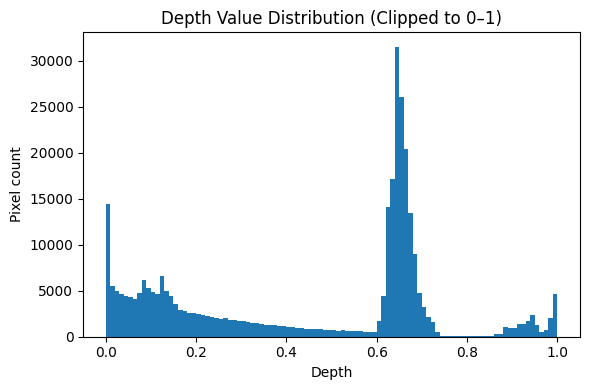

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# —————————————————————
# 1) Load your depth map
# —————————————————————
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path)   # arr.shape == (H, W)

# ————————————————————————————————————————
# 2) Hard-code your decoded keypoints (x, y) here
# ————————————————————————————————————————
# From your “Decoded keypoints” output:
keypoints = np.array([
    [363, 215],
    [369, 211],
    [363, 209],
    [370, 215],
    [346, 209],
    [371, 239],
    [327, 231],
    [405, 231],
    [290, 249],
    [415, 201],
    [307, 241],
    [340, 315],
    [306, 302],
    [337, 363],
    [263, 357],
    [330, 408],
    [239, 408],
    [364, 196],
    [353, 233],
    [320, 306],
    [335, 410],
    [222, 417],
    [336, 410],
    [222, 410],
    [324, 408],
    [222, 410],
])
# squeeze out any batch-dim and round to integer pixel coords:
manual_pts = np.round(keypoints).astype(int)  # shape (26,2)

# ——————————————————————————————————
# 3) Clip them to image bounds
# ——————————————————————————————————
H, W = arr.shape
manual_pts[:, 0] = np.clip(manual_pts[:, 0], 0, W-1)  # x
manual_pts[:, 1] = np.clip(manual_pts[:, 1], 0, H-1)  # y

# ——————————————————————————————————
# 4) Sample depth at those pixels
# ——————————————————————————————————
depths_at_pts = arr[manual_pts[:,1], manual_pts[:,0]]  # (26,)

# ——————————————————————————————————
# 5) Visualize
# ——————————————————————————————————
plt.figure(figsize=(8,6))
masked = np.ma.masked_invalid(arr)
im = plt.imshow(masked, cmap='plasma')
plt.title('Depth Map with Pose Keypoints')

# draw keypoints
plt.scatter(manual_pts[:,0], manual_pts[:,1],
            c='white', s=40, marker='.', label='pose keypoints')
for (x,y), d in zip(manual_pts, depths_at_pts):
    plt.text(x+2, y+2, f'{d:.2f}',
             color='white', fontsize=8, weight='bold')
plt.axis('off')
plt.legend(loc='upper right')
plt.show()

# ——————————————————————————————————
# 6) Print out the depths
# ——————————————————————————————————
print("Pose keypoints (x, y) → depth:")
for (x,y), d in zip(manual_pts, depths_at_pts):
    print(f"  ({x:3d}, {y:3d}) → {d:.16f}")


# ------------------------------------------------------------
# 7) Summary statistics for the whole depth map
# ------------------------------------------------------------
full_vals = arr[np.isfinite(arr)].astype(np.float64)         # all valid pixels

full_stats = {
    "min"   : float(full_vals.min()),
    "max"   : float(full_vals.max()),
    "mean"  : float(full_vals.mean()),
    "median": float(np.median(full_vals)),
    "std"   : float(full_vals.std()),
    "pixels": full_vals.size,
}

print("\nSummary statistics for the ENTIRE depth map")
for k, v in full_stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")

# ------------------------------------------------------------
# 8) Summary statistics for the 26 pose key-points
# ------------------------------------------------------------
kp_stats = {
    "min"   : float(depths_at_pts.min()),
    "max"   : float(depths_at_pts.max()),
    "mean"  : float(depths_at_pts.mean()),
    "median": float(np.median(depths_at_pts)),
    "std"   : float(depths_at_pts.std()),
    "points": depths_at_pts.size,
}

print("\nSummary statistics for the 26 pose key-points")
for k, v in kp_stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")



print("Check full_vals range:")
print("  min:", full_vals.min())
print("  max:", full_vals.max())
print("  99th percentile:", np.percentile(full_vals, 99))
print("  99.9th percentile:", np.percentile(full_vals, 99.9))
print("Infs in full_vals:", np.isinf(full_vals).sum())
print("Max full_vals:", np.max(full_vals))
print("Top 5 largest values:", np.sort(full_vals)[-5:])
print("arr dtype:", arr.dtype)


# Plot histogram to visualize distribution
plt.figure(figsize=(6,4))
plt.hist(full_vals, bins=100, range=(0, 1))  # Adjust range if needed
plt.title("Depth Value Distribution (Clipped to 0–1)")
plt.xlabel("Depth")
plt.ylabel("Pixel count")
plt.tight_layout()
plt.show()



## Depth comparison relative to the person inside the bounding box, not the enitre scene



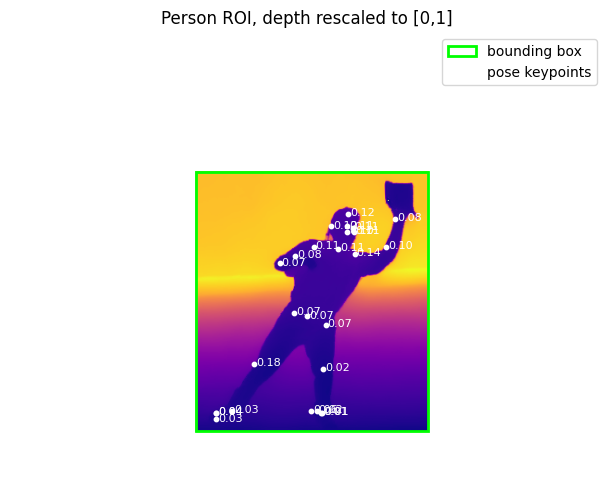

Pose key-points (x, y) → depth [0-1 within box]:
  (363, 215) → 0.104065
  (369, 211) → 0.108521
  (363, 209) → 0.106018
  (370, 215) → 0.110657
  (346, 209) → 0.119751
  (371, 239) → 0.138306
  (327, 231) → 0.112976
  (405, 231) → 0.098206
  (290, 249) → 0.068359
  (415, 201) → 0.078430
  (307, 241) → 0.076904
  (340, 315) → 0.065186
  (306, 302) → 0.068848
  (337, 363) → 0.019226
  (263, 357) → 0.180664
  (330, 408) → 0.019943
  (239, 408) → 0.027161
  (364, 196) → 0.120667
  (353, 233) → 0.111206
  (320, 306) → 0.067383
  (335, 410) → 0.014687
  (222, 417) → 0.027695
  (336, 410) → 0.014153
  (222, 410) → 0.040588
  (324, 408) → 0.063232
  (222, 410) → 0.040588

Summary statistics for *rescaled* depth inside ROI
     min: 0.000000
     max: 1.000000
    mean: 0.437988
  median: 0.313721
     std: 0.361328
  pixels: 70531

Summary statistics for pose key-points inside ROI
     min: 0.014153
     max: 0.180664
    mean: 0.077026
  median: 0.072876
     std: 0.042694
  points: 26


In [ ]:
# ------------------------------------------------------------
# 1) Bounding-box mask
# ------------------------------------------------------------
# coordinates:  (x1, y1) = top-left,  (x2, y2) = bottom-right
x1, y1, x2, y2 = 200, 150, 450, 430          # <-- edit here
bbox = np.array([x1, y1, x2, y2], int)

H, W = arr.shape
# boolean mask: True inside the box
mask = np.zeros((H, W), dtype=bool)
mask[bbox[1]:bbox[3]+1, bbox[0]:bbox[2]+1] = True

# ------------------------------------------------------------
# 2) Min-max rescale inside the box
# ------------------------------------------------------------
masked_vals = arr[mask]
d_min, d_max = masked_vals.min(), masked_vals.max()

# avoid /0 if flat
if d_max > d_min:
    arr_rescaled = (arr - d_min) / (d_max - d_min)
else:                                    # flat plane
    arr_rescaled = np.zeros_like(arr)

# keep only ROI; set background to 0 (or np.nan)
background_val = 0.0                     # change to np.nan if preferred
arr_roi = np.where(mask, arr_rescaled, background_val)

# ------------------------------------------------------------
# 3) Depth at pose key-points *after* scaling
# ------------------------------------------------------------
# re-use manual_pts from your snippet
depths_roi = arr_roi[manual_pts[:,1], manual_pts[:,0]]

# ------------------------------------------------------------
# 4) Visualise
# ------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.imshow(np.ma.masked_equal(arr_roi, background_val), cmap='plasma')
plt.title('Person ROI, depth rescaled to [0,1]')

# draw bbox
plt.gca().add_patch(
    plt.Rectangle((x1, y1), x2-x1, y2-y1,
                  edgecolor='lime', facecolor='none', linewidth=2,
                  label='bounding box')
)

# draw key-points
plt.scatter(manual_pts[:,0], manual_pts[:,1],
            c='white', s=40, marker='.', label='pose keypoints')

for (x,y), d in zip(manual_pts, depths_roi):
    plt.text(x+2, y+2, f'{d:.2f}', color='white', fontsize=8)

plt.axis('off')
plt.legend(loc='upper right')
plt.show()

# ------------------------------------------------------------
# 5) Print depths
# ------------------------------------------------------------
print("Pose key-points (x, y) → depth [0-1 within box]:")
for (x,y), d in zip(manual_pts, depths_roi):
    print(f"  ({x:3d}, {y:3d}) → {d:.6f}")

# ------------------------------------------------------------
# 6) Summary statistics inside the ROI
# ------------------------------------------------------------
roi_vals = arr_roi[mask]          # these are already ∈ [0,1]

stats = {
    "min":    float(roi_vals.min()),
    "max":    float(roi_vals.max()),
    "mean":   float(roi_vals.mean()),
    "median": float(np.median(roi_vals)),
    "std":    float(roi_vals.std()),
    "pixels": roi_vals.size,
}

print("\nSummary statistics for *rescaled* depth inside ROI")
for k, v in stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")

pose_stats_roi = {
    "min"   : float(depths_roi.min()),
    "max"   : float(depths_roi.max()),
    "mean"  : float(depths_roi.mean()),
    "median": float(np.median(depths_roi)),
    "std"   : float(depths_roi.std()),
    "points": depths_roi.size,
}

print("\nSummary statistics for pose key-points inside ROI")
for k, v in pose_stats_roi.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")
